In [367]:
import sys
sys.path.append('../../')
from helpers.window import window_input_output

In [368]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [369]:
df = pd.read_csv('../../datasets/Conventional.csv')
df.head()

,Date,Envi,Fuji,Gala
0,2015-01-04,117454,429518,5554
1,2015-01-11,110974,427723,5358
2,2015-01-18,151977,500684,4225
3,2015-01-25,140914,422435,4945
4,2015-02-01,217716,608156,5736


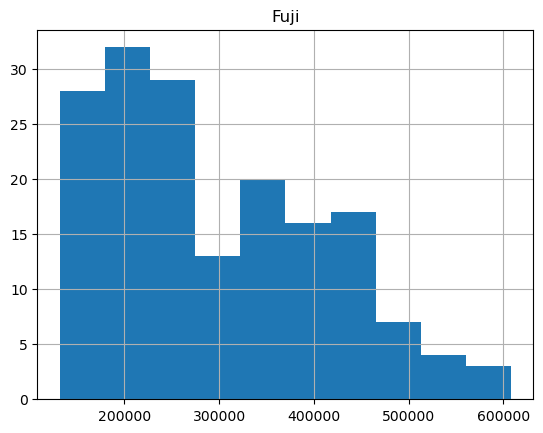

In [370]:
data = df[['Fuji']]
data.hist();

In [371]:
in_ = 6
out_ = 6
seq_df = window_input_output(in_, out_, data)
seq_df

,Fuji,x_1,x_2,x_3,x_4,x_5,y_0,y_1,y_2,y_3,y_4,y_5
11,380285,403061.0,491584.0,487874.0,584094.0,404107.0,466313.0,608156.0,422435.0,500684.0,427723.0,429518.0
12,371990,380285.0,403061.0,491584.0,487874.0,584094.0,404107.0,466313.0,608156.0,422435.0,500684.0,427723.0
13,396450,371990.0,380285.0,403061.0,491584.0,487874.0,584094.0,404107.0,466313.0,608156.0,422435.0,500684.0
14,574793,396450.0,371990.0,380285.0,403061.0,491584.0,487874.0,584094.0,404107.0,466313.0,608156.0,422435.0
15,544167,574793.0,396450.0,371990.0,380285.0,403061.0,491584.0,487874.0,584094.0,404107.0,466313.0,608156.0
...,...,...,...,...,...,...,...,...,...,...,...,...
164,254658,197245.0,251175.0,468889.0,215803.0,233969.0,323916.0,292349.0,355322.0,171218.0,154962.0,330683.0
165,258653,254658.0,197245.0,251175.0,468889.0,215803.0,233969.0,323916.0,292349.0,355322.0,171218.0,154962.0
166,205340,258653.0,254658.0,197245.0,251175.0,468889.0,215803.0,233969.0,323916.0,292349.0,355322.0,171218.0
167,260748,205340.0,258653.0,254658.0,197245.0,251175.0,468889.0,215803.0,233969.0,323916.0,292349.0,355322.0


## Split data

In [372]:
X_cols = [col for col in seq_df.columns if col.startswith('x')]
X_cols.insert(0, 'Fuji')
y_cols = [col for col in seq_df.columns if col.startswith('y')]

X = seq_df[X_cols]
y = seq_df[y_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=123)

In [373]:
model = Lasso()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

## Score

In [374]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Fuji):", mse)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (Fuji):", mae)

print("R-squared (Test score)", model.score(X_test, y_test))
print("Train score", model.score(X_train, y_train))

Mean Squared Error (Fuji): 7482326653.964009
Mean Absolute Error (Fuji): 71941.79105438752
R-squared (Test score) -0.3606761435309355
Train score 0.5262183747210286


## Visualization

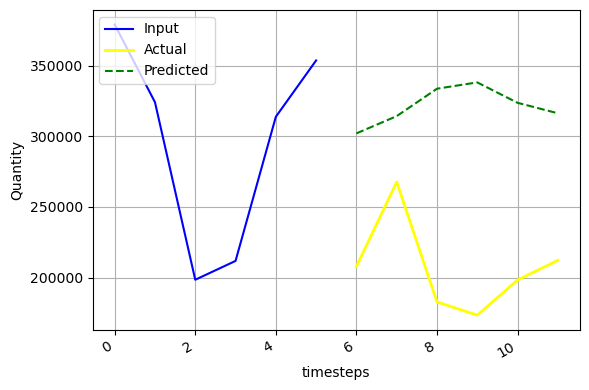

In [375]:
X_test_array = X_test.to_numpy()
y_test_array = y_test.to_numpy()

fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(np.arange(0, in_, 1), X_test_array[1], 'b-', label='Input')
ax.plot(np.arange(in_, in_ + out_, 1), y_test_array[1], color='yellow', label='Actual', linewidth=2)
ax.plot(np.arange(in_, in_ + out_, 1), y_pred[1], color='green', label='Predicted', linestyle='--')

ax.set_xlabel('timesteps')
ax.set_ylabel('Quantity')
plt.grid(True)
plt.legend(loc=2)
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

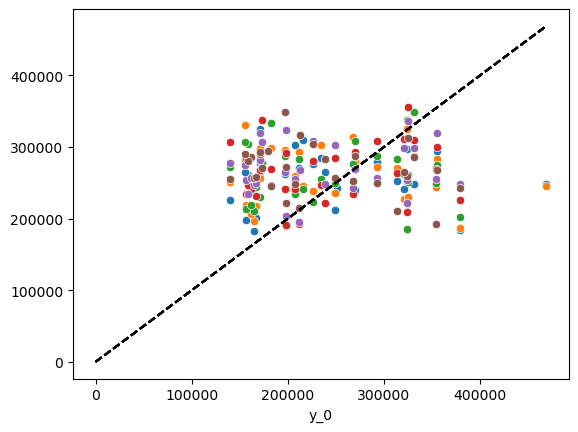

In [376]:
for i, col in enumerate(y_test.columns):
    sns.scatterplot(x=y_test[col], y=y_pred[:, i])

    max_val = max(y_test.max().max(), y_pred.max().max())
    plt.plot([0, max_val], [0, max_val], color='black', linestyle='--')